In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\chaud\OneDrive\Desktop\googreads book project\cleaned_books.csv")
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

#Top Authors with the Most Popular Books (Based on Ratings Count & Reviews Count)
The most popular author is the one whose books have received the highest number of ratings and reviews.
By aggregating ratings_count and text_reviews_count per author, we can identify the top 10 most influential authors in the dataset.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Aggregate ratings and reviews count per author
author_popularity = df.groupby('authors')[['ratings_count', 'text_reviews_count']].sum()

# Sort by highest ratings count
top_authors = author_popularity.sort_values(by='ratings_count', ascending=False).head(10)

print(top_authors)  # Check top authors' data


                                         ratings_count  text_reviews_count
authors                                                                   
J.K. Rowling/Mary GrandPré                     8923980              128006
J.R.R. Tolkien                                 4776638               49090
Stephenie Meyer                                4597666               94265
Dan Brown                                      4135380               60875
Nicholas Sparks                                3048149               60426
Stephen King                                   2985634               55897
J.D. Salinger                                  2777908               52598
Rick Riordan                                   2413447               69769
George Orwell/Boris Grabnar/Peter Škerl        2111750               29677
John Steinbeck                                 2091579               41021


C:\Users\chaud\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


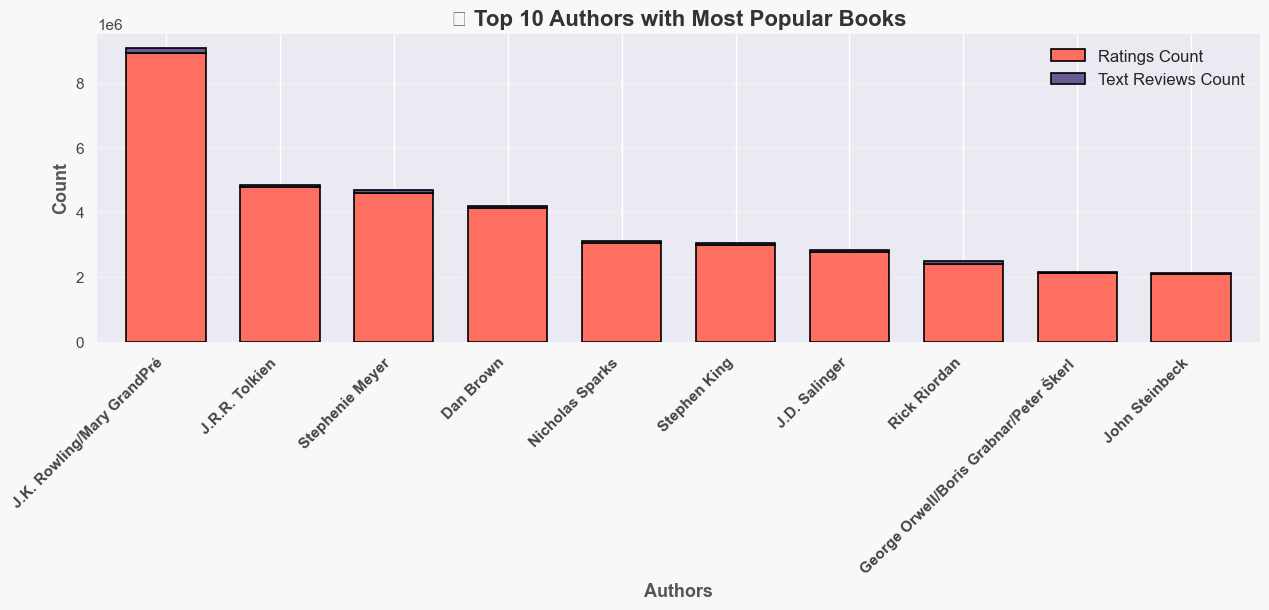

In [5]:


# Set Seaborn style for better visuals
sns.set_theme(style="darkgrid")  # White background for a cleaner look

# Define custom colors
colors = ["#FF6F61", "#6B5B95"]  # Coral for Ratings, Purple for Reviews

# Create figure with background color
fig, ax = plt.subplots(figsize=(15, 4), facecolor="#F8F8F8")  # Soft Gray Background

# Plot stacked bar chart
top_authors[['ratings_count', 'text_reviews_count']].plot(
    kind='bar', stacked=True, width=0.7, color=colors, edgecolor="black", linewidth=1.2, ax=ax
)

# Add Title & Labels with styling
ax.set_title("📚 Top 10 Authors with Most Popular Books", fontsize=16, fontweight="bold", color="#333")
ax.set_xlabel("Authors", fontsize=13, fontweight="bold", color="#555")
ax.set_ylabel("Count", fontsize=13, fontweight="bold", color="#555")

# Customize X & Y ticks
ax.set_xticklabels(top_authors.index, rotation=45, ha='right', fontsize=11, fontweight="bold", color="#444")
ax.tick_params(axis='y', labelsize=11, colors="#444")

# Add grid for better readability
ax.grid(axis="y", linestyle="--", alpha=0.5)

# Remove box around the chart
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Customize legend
ax.legend(["Ratings Count", "Text Reviews Count"], fontsize=12, loc="upper right", frameon=False)

# Show plot
plt.show()


#INSIGHT 2: Trends in Book Publications Over the Years
A line graph showing the number of books published per year can reveal industry trends.
We can also analyze which authors have been consistently active over the years.

C:\Users\chaud\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


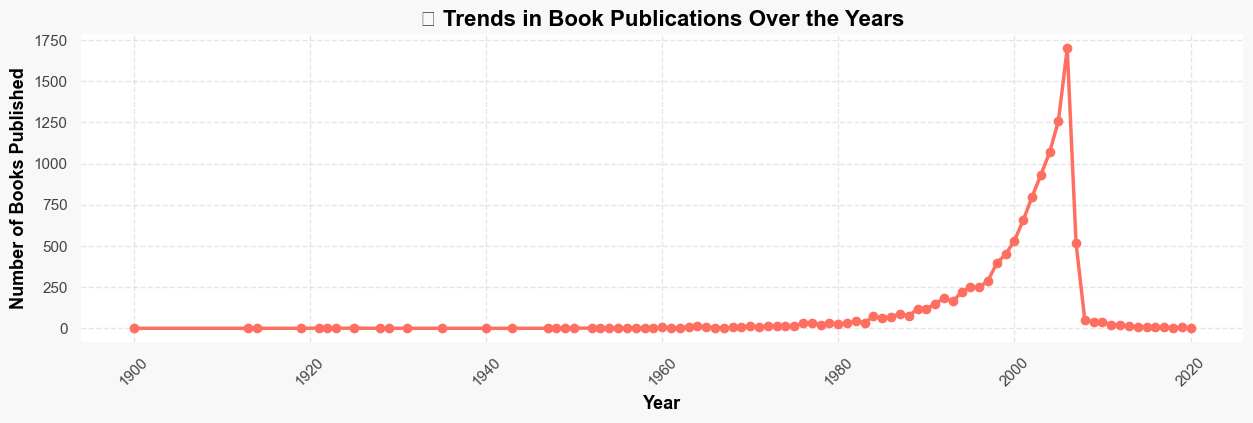

In [6]:

# Convert publication_date to datetime & extract year
df['publication_year'] = pd.to_datetime(df['publication_date'], errors='coerce').dt.year

# Count books published per year
books_per_year = df['publication_year'].value_counts().sort_index()

# Set Seaborn theme
sns.set_style("whitegrid")

# Create figure with background color
fig, ax = plt.subplots(figsize=(15, 4), facecolor="#F8F8F8")

# Plot the line chart
ax.plot(books_per_year.index, books_per_year.values, marker='o', linestyle='-', color="#FF6F61", linewidth=2.5, markersize=6)

# Add title and labels with styling
ax.set_title("📖 Trends in Book Publications Over the Years", fontsize=16, fontweight="bold", color="black")
ax.set_xlabel("Year", fontsize=13, fontweight="bold", color="black")
ax.set_ylabel("Number of Books Published", fontsize=13, fontweight="bold", color="black")

# Customize x & y ticks
ax.tick_params(axis='x', labelsize=11, rotation=45, colors="#444")
ax.tick_params(axis='y', labelsize=11, colors="#444")

# Add grid with transparency
ax.grid(alpha=0.5, linestyle="--")

# Remove chart borders for a clean look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Show the plot
plt.show()


#INSIGHTS 3: Language-Wise Book Distribution
Most books are expected to be in English, but analyzing books in other languages can reveal diversity in readership.
A pie chart of language distribution can be an effective visualization.

C:\Users\chaud\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


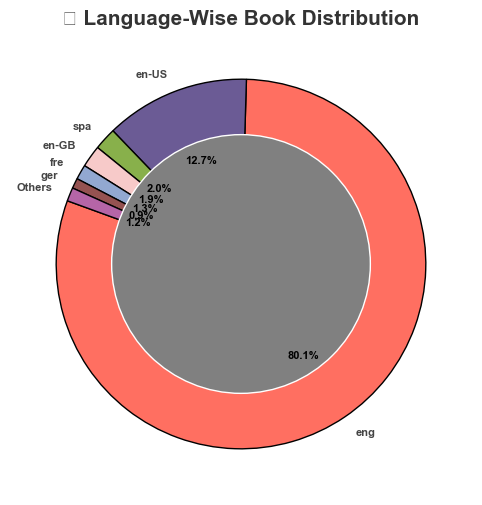

In [7]:

# Count books per language
language_distribution = df['language_code'].value_counts()

# Group smaller languages into "Others"
top_languages = language_distribution[language_distribution > 50]  # Keeping languages with > 50 books
others_count = language_distribution[language_distribution <= 50].sum()  # Grouping smaller categories

# Append "Others" to the dataset
top_languages["Others"] = others_count

# Define color palette
colors = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#955251", "#B565A7", "#009B77"]

# Create figure
plt.figure(figsize=(8,6), facecolor="white")

# Create donut chart
wedges, texts, autotexts = plt.pie(top_languages, labels=top_languages.index, autopct="%1.1f%%", 
                                   startangle=160, colors=colors, wedgeprops={"edgecolor": "black", "linewidth": 1})

# Add a white circle in the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='gray')
plt.gca().add_artist(centre_circle)

# Style text
for text in texts:
    text.set(fontsize=8, fontweight="bold", color="#444")
for autotext in autotexts:
    autotext.set(fontsize=8, fontweight="bold", color="black")

# Add title
plt.title("🌍 Language-Wise Book Distribution", fontsize=15, fontweight="bold", color="#333")

# Show the plot
plt.show()


#INSIGHTS 4: The Most Divisive Books – Love or Hate?
Question: Which books have extremely high ratings but also a high number of 1-star reviews?

💡 Why is this a unique angle?

It finds books that create controversy—some readers adore them, others hate them.
Publishers and book critics would love to analyze this. ye do eda me krke 

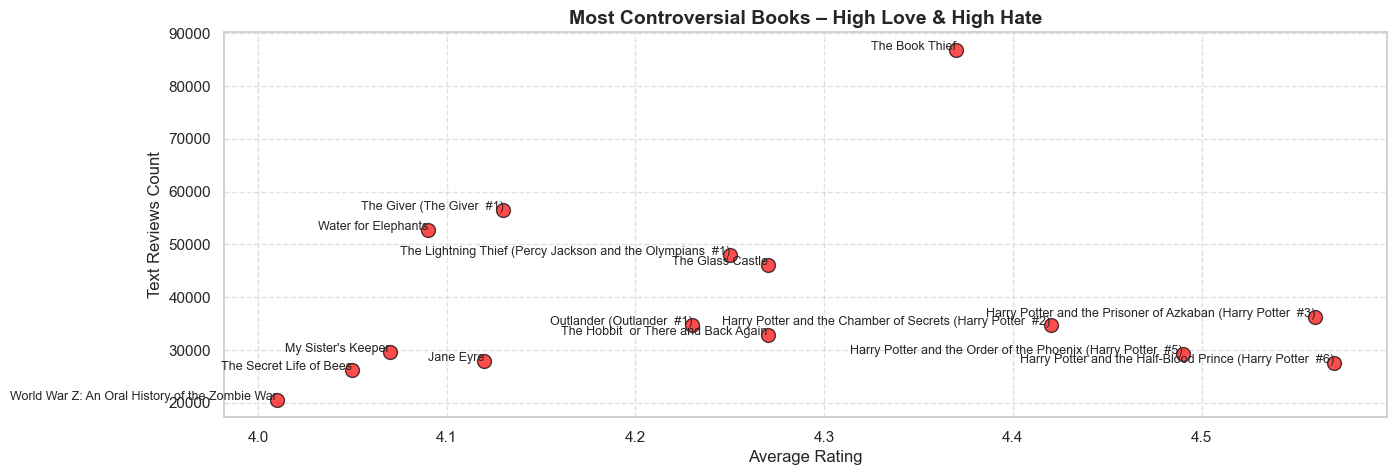

In [8]:
# Step 1: Filter books with high ratings (above 4.0) but also high text reviews (controversial books)
controversial_books = df[(df['average_rating'] > 4.0) & (df['text_reviews_count'] > df['text_reviews_count'].quantile(0.75))]

# Step 2: Sort by reviews count to find the most divisive books
controversial_books = controversial_books.sort_values(by='text_reviews_count', ascending=False).head(15)

# Step 3: Scatter Plot - Ratings vs. Reviews (Controversy Visualization)
plt.figure(figsize=(15, 5))
plt.scatter(controversial_books['average_rating'], controversial_books['text_reviews_count'], 
            color='red', s=100, edgecolors='black', alpha=0.7)

# Add book titles as labels in the chart
for i, row in controversial_books.iterrows():
    plt.text(row['average_rating'], row['text_reviews_count'], row['title'], fontsize=9, ha='right')

plt.title("Most Controversial Books – High Love & High Hate", fontsize=14, fontweight='bold')
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Text Reviews Count", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


#INSIGHTS 5: Bestseller Authors – The Masters of Popularity!
Question: Which authors have written the most books that have an average rating above 4.5 and a high ratings_count?

💡 Why is this insightful?

It identifies authors who consistently write highly-rated books, not just one-hit wonders.
It separates truly great authors from those who wrote many books but didn't receive high ratings.

C:\Users\chaud\AppData\Local\Temp\ipykernel_11884\184395517.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bestseller_authors.values, y=bestseller_authors.index, palette="viridis")
C:\Users\chaud\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


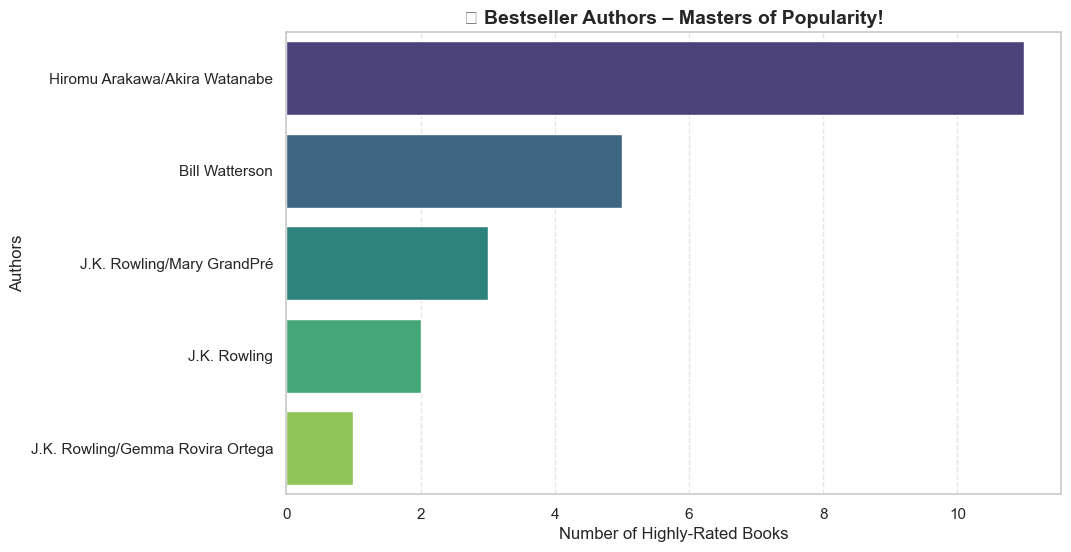

In [9]:

# Step 1: Filter books with high ratings (above 4.5) and high ratings count
threshold_ratings_count = df['ratings_count'].quantile(0.75)  # Top 25% books
bestseller_books = df[(df['average_rating'] > 4.5) & (df['ratings_count'] > threshold_ratings_count)]

# Step 2: Count the number of such books per author
bestseller_authors = bestseller_books['authors'].value_counts().head(5)

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=bestseller_authors.values, y=bestseller_authors.index, palette="viridis")

# Formatting
plt.title("🌟 Bestseller Authors – Masters of Popularity!", fontsize=14, fontweight="bold")
plt.xlabel("Number of Highly-Rated Books", fontsize=12)
plt.ylabel("Authors", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Show the plot
plt.show()


#INSIGHTS 6: The Oldest Yet Still Popular Books 📜
📌 What are we analyzing?
Some books, despite being very old, still receive high ratings and reviews. This insight highlights the timeless classics that continue to be loved by readers.

🔍 Steps:

Identify books that were published before 1950 (old books).
Find which of these books have an average rating > 4.0 and high ratings count.
Rank the top 5 most popular old books based on ratings_count.
🎨 Best Chart: Bar Chart (Old Books That Are Still Popular)

C:\Users\chaud\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128220 (\N{SCROLL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


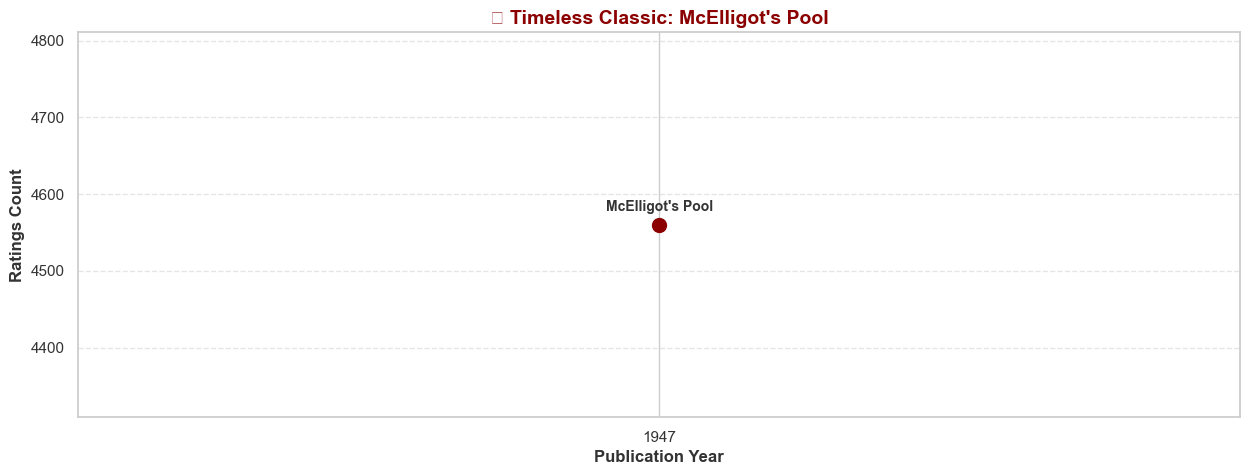

In [10]:
 #Ensure publication_date is in datetime format
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

# Extract year from publication date
df['publication_year'] = df['publication_date'].dt.year

# Filter books published before 1950 with avg rating > 4.0
old_popular_books = df[(df['publication_year'] < 1950) & (df['average_rating'] > 4.0)]

# Select the most popular book with highest ratings_count
top_old_book = old_popular_books.loc[old_popular_books['ratings_count'].idxmax()]

# Plot line chart
plt.figure(figsize=(15, 5))
plt.plot(top_old_book['publication_year'], top_old_book['ratings_count'], marker='o', linestyle='-', color='#8B0000', linewidth=3, markersize=10)

# Styling the chart
plt.xlabel("Publication Year", fontsize=12, fontweight='bold', color="#333333")
plt.ylabel("Ratings Count", fontsize=12, fontweight='bold', color="#333333")
plt.title(f"📜 Timeless Classic: {top_old_book['title']}", fontsize=14, fontweight='bold', color="#8B0000")
plt.xticks([top_old_book['publication_year']], color="#333333")
plt.yticks(color="#333333")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Annotate book title on the chart
plt.annotate(top_old_book['title'], (top_old_book['publication_year'], top_old_book['ratings_count']),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold', color="#333333")

# Display the chart
plt.show()


C:\Users\chaud\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


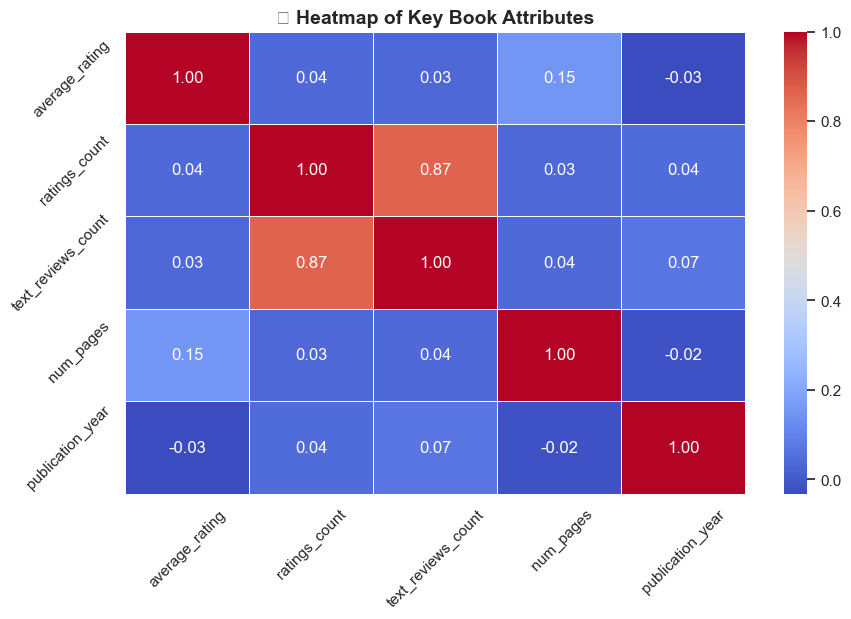

In [11]:

# Convert publication_date to year only
df['publication_year'] = pd.to_datetime(df['publication_date'], errors='coerce').dt.year

# Select numerical columns for correlation analysis
num_cols = ['average_rating', 'ratings_count', 'text_reviews_count', '  num_pages', 'publication_year']

# Create the correlation matrix
corr_matrix = df[num_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title("📚 Heatmap of Key Book Attributes", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()


📌 Mean Squared Error: 0.12
📌 R² Score: 0.0295


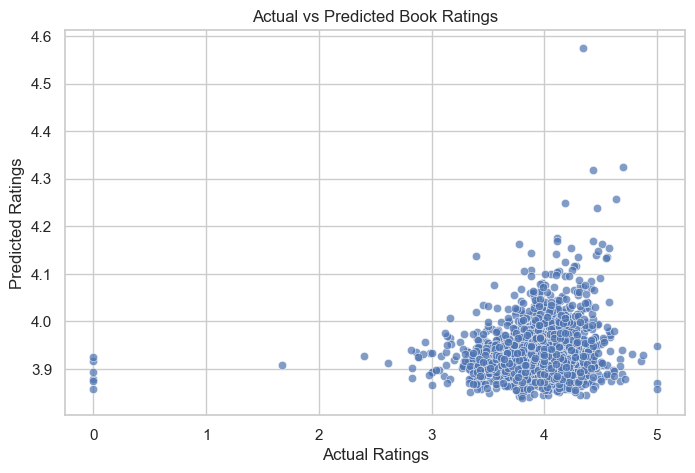

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Data
df = pd.read_csv(r"C:\Users\chaud\OneDrive\Desktop\googreads book project\cleaned_books.csv")

# 🔧 Fix column name spaces
df.columns = df.columns.str.strip()

# 🔹 Encoding Categorical Features
label_enc = LabelEncoder()
df['authors'] = label_enc.fit_transform(df['authors'])
df['publisher'] = label_enc.fit_transform(df['publisher'])
df['language_code'] = label_enc.fit_transform(df['language_code'])

# 🔹 Selecting Features & Target
X = df[['authors', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publisher']]
y = df['average_rating']

# 🔹 Standardizing Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔹 Training Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔹 Predictions
y_pred = model.predict(X_test)

# 🔹 Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📌 Mean Squared Error: {mse:.2f}")
print(f"📌 R² Score: {r2:.4f}")

# 🔹 Scatter Plot: Actual vs Predicted Ratings
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Book Ratings")
plt.show()


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"C:\Users\chaud\OneDrive\Desktop\googreads book project\cleaned_books.csv")

# Handling column name issue (removing extra spaces)
df.columns = df.columns.str.strip()

# Encoding categorical variables
label_enc = LabelEncoder()
df['authors'] = label_enc.fit_transform(df['authors'])
df['language_code'] = label_enc.fit_transform(df['language_code'])
df['publisher'] = label_enc.fit_transform(df['publisher'])

# Selecting Features and Target
X = df[['authors', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publisher']]
y = df['average_rating']

# Handling missing values
X.fillna(X.median(), inplace=True)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📌 Mean Squared Error: {mse:.2f}")
print(f"📌 R² Score: {r2:.4f}")


C:\Users\chaud\AppData\Local\Temp\ipykernel_11884\3796437381.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


📌 Mean Squared Error: 0.11
📌 R² Score: 0.1394


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"C:\Users\chaud\OneDrive\Desktop\googreads book project\cleaned_books.csv")  

# Handling column name issue (removing extra spaces)
df.columns = df.columns.str.strip()

# Encoding categorical variables
label_enc = LabelEncoder()
df['authors'] = label_enc.fit_transform(df['authors'])
df['publisher'] = label_enc.fit_transform(df['publisher'])
df['language_code'] = label_enc.fit_transform(df['language_code'])

# Selecting Features and Target
X = df[['authors', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publisher']]
y = df['average_rating']

# Handling missing values correctly
X = X.copy()
X = X.fillna(X.median())

# Standardizing Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Optimized XGBoost Model**
model = XGBRegressor(
    n_estimators=1000,  # More trees for better learning
    max_depth=12,       # Increase depth for complex relations
    learning_rate=0.03,  # Slower learning rate for better convergence
    subsample=0.8,      # Use 80% of data to reduce overfitting
    colsample_bytree=0.8,  # Use 80% of features
    random_state=42
)

# Model Training
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📌 Mean Squared Error: {mse:.4f}")
print(f"📌 R² Score: {r2:.4f}")


📌 Mean Squared Error: 0.1031
📌 R² Score: 0.1827
